We will find all pictures in a big one and save them independently
![title](img.jpg)

In [3]:
from numpy import int0, zeros_like, deg2rad, sin, cos, dot, array as nparray
from math import ceil
import cv2
from os import mkdir, chdir
from os.path import basename, dirname, isdir, join as path_join
from argparse import ArgumentParser

In [4]:
def get_contours(src, num=0):
    src = cv2.copyMakeBorder(src, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=(255, 255, 255))
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)[1]
    contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)[1]
    if not num:
        return sorted(contours, key = cv2.contourArea, reverse = True)[1]
    else:
        return sorted(contours, key = cv2.contourArea, reverse = True)[1:num+1]

In [5]:
def rotate(contour, src):
	#вычисляем угол поворота
	angle = cv2.minAreaRect(contour)[2]
	if angle > 45:
		angle -= 90
	if angle < -45:
		angle += 90
	#получаем ширину и высоту
	w, h = src.shape[1], src.shape[0]
	#переводим градусы в радианы
	rotangle = deg2rad(angle)
	#вычисляем новые ширину и высоту изображения
	nw = abs(sin(rotangle)*h) + abs(cos(rotangle)*w)
	nh = abs(cos(rotangle)*h) + abs(sin(rotangle)*w)
	#строим матрицу поворота
	rotation_matrix = cv2.getRotationMatrix2D((nw*0.5, nh*0.5), angle, 1.0)
	rotatiom_move = dot(rotation_matrix, nparray([(nw-w)*0.5, (nh-h)*0.5,0]))
	rotation_matrix[0,2] += rotatiom_move[0]
	rotation_matrix[1,2] += rotatiom_move[1]
	#поворачиваем изображение
	src = cv2.warpAffine(src, rotation_matrix, (int(ceil(nw)), int(ceil(nh))), flags=cv2.INTER_LANCZOS4, borderValue=(255,255,255))
	#избавляемся от белой рамки по краям
	ca = int0(cv2.boxPoints(cv2.minAreaRect(get_contours(src))))
	#кропаем и возвращаем из функции повернутое, "чистое" изображение
	return src[ca[2][1]+14:ca[0][1]-3,ca[1][0]+3:ca[3][0]-3]

In [36]:
def main( number, image):
    #parser = ArgumentParser(description='separate images')
    #parser.add_argument('-n', type=int, dest='number', required=True, help='number of elements in picture')
    #parser.add_argument('-i', dest='image', required=True, help='path to original file')
    #args = parser.parse_args()
    
    #folder = dirname(args.image)
    #image_name = basename(args.image)
    folder = dirname(image)
    image_name = basename(image)
    extension = image_name.split('.')[-1]
    image_name_without_extension = '.'.join(image_name.split('.')[:-1])
    if folder:
        chdir(folder)
    if not isdir(image_name_without_extension):
        mkdir(image_name_without_extension)
    
    image = cv2.imread(image_name)
    #contours = get_contours(image, args.number)
    contours = get_contours(image, number)
    
    i = 1
    
    for c in contours:
        ca = int0(cv2.boxPoints(cv2.minAreaRect(c)))
        im = image[ca[2][1]:ca[0][1], ca[1][0]:ca[3][0]]
        im = rotate(ca, im)
        cv2.imwrite(path_join(image_name_without_extension, '%s.%s'%(i, extension)), im)
        %matplotlib inline
        import matplotlib.pyplot as plt
        img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.imshow(img)
        plt.show()
        i += 1

#if __name__=='__main__': main()

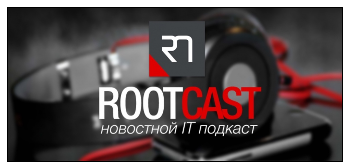

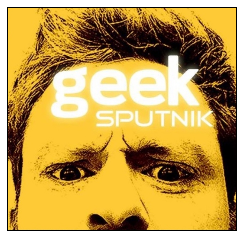

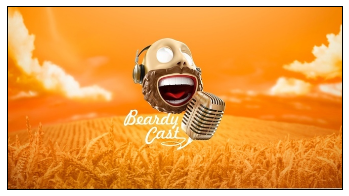

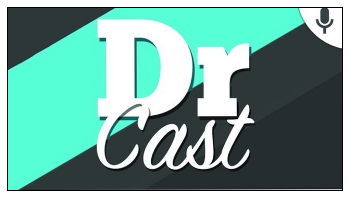

In [37]:
main(4,'img.jpg')